
# Assignment 2: Code for data modelling report

## 1. Exploratory Data Analysis (EDA)

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.cluster import silhouette_score, adjusted_rand_score

In [2]:
# load the dataframe
df = pd.read_csv('A2_HR_Employee_Data.csv', sep=',', header=0)

### 1.1 Explore each column using descriptive analytics/graphs

We start by displaying some basic statistics of the columns we will analyse further to answer our research question.

In [3]:
# Display each column, their count and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Resigned                  1470 non-null   object 
 3   BusinessTravel            1470 non-null   object 
 4   BusinessUnit              1470 non-null   object 
 5   EducationLevel            1470 non-null   int64  
 6   Gender                    1470 non-null   object 
 7   JobSatisfaction           1470 non-null   int64  
 8   MaritalStatus             1470 non-null   object 
 9   MonthlyIncome             1470 non-null   int64  
 10  NumCompaniesWorked        1470 non-null   int64  
 11  OverTime                  1470 non-null   object 
 12  PercentSalaryHike         1470 non-null   int64  
 13  PerformanceRating         1470 non-null   int64  
 14  AverageW

In [4]:
df.describe()

,EmployeeID,Age,EducationLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,5491.933333,36.923810,2.912925,2.728571,6502.931293,2.693197,15.209524,3.153741,43.042177,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,2573.640304,9.135373,1.024165,1.102846,4707.956783,2.498009,3.659938,0.360824,5.389864,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1006.000000,18.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3286.250000,30.000000,2.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,40.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,5484.500000,36.000000,3.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,40.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,7766.250000,43.000000,4.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,47.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,9991.000000,60.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,71.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
# Display all features and they unique variables
df_columns = df.columns
for column in df_columns:
    print(f"Unique values in {column}:")
    print(f"{df[column].value_counts().sort_index()}")
    print(f"Count of all unqiue values: {df[column].value_counts().count()}\n\n")

Unique values in EmployeeID:
1006    1
1009    1
1018    1
1021    1
1023    1
       ..
9978    1
9984    1
9988    1
9989    1
9991    1
Name: EmployeeID, Length: 1470, dtype: int64
Count of all unqiue values: 1470


Unique values in Age:
18     8
19     9
20    11
21    13
22    16
23    14
24    26
25    26
26    39
27    48
28    48
29    68
30    60
31    69
32    61
33    58
34    77
35    78
36    69
37    50
38    58
39    42
40    57
41    40
42    46
43    32
44    33
45    41
46    33
47    24
48    19
49    24
50    30
51    19
52    18
53    19
54    18
55    22
56    14
57     4
58    14
59    10
60     5
Name: Age, dtype: int64
Count of all unqiue values: 43


Unique values in Resigned:
No     1233
Yes     237
Name: Resigned, dtype: int64
Count of all unqiue values: 2


Unique values in BusinessTravel:
Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
Name: BusinessTravel, dtype: int64
Count of all unqiue values: 3


Unique values in Business

The below will create a new function that plots every column to assure reproducibility and to ensure easier plotting of all columns :

In [6]:
def plot_data(dataset, column, kind='count', title=None, xlabel=None, ylabel='Count', palette='Set2', ax=None):
    # Define the plots
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,6))
    
    if kind == 'count':
        sns.countplot(data=dataset, x=column, palette=palette, ax=ax)
    elif kind == 'box':
        sns.boxplot(data=dataset, y=column, palette=palette, ax=ax)
    elif kind == 'bar':
        sns.barplot(data=dataset, x=column, palette=palette, ax=ax)
    elif kind == 'kde':
        sns.kdeplot(data=dataset, x=column, cut=0, palette=palette, ax=ax)
    elif kind == 'violin':
        sns.violinplot(data=dataset, y=column, palette=palette, bw=0.5, scale = 'area', ax=ax)
    elif kind == 'heatmap':
        sns.heatmap(data=dataset, annot=True, linewidths=0.6, fmt='.2f')
    else:
        raise ValueError(f'Plot kind {kind} does not work, use "count", "box", "kde", "violin", or "bar".')
    # Setting the title, oabels and grid
    if title is None:
        title = f'Distribution of {column}'
    if xlabel is None:
        xlabel = column
    if ylabel is None:
        ylabel = 'Count'
    # Customisation    
    ax.set_title(title, fontsize=20, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=18)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.tick_params(axis='x', rotation=90)  
    plt.tight_layout(pad=2.0)
    if kind != 'heatmap':
        ax.grid(True)

### 1.1.1 Distribution of resigned employees, Gender and Business Units
First, we use a countplot to show the distribution of employees who have resigned versus those who have not. This helps understanding who is staying and is important for identifying attrition patterns. The second plot visualises the gender distribution to identify potential gender disparities within the workforce, which might influence employee satisfaction. It is essential to understand imbalances that could be identifies as gender bias. The third qualitative graph displays the distribution of employees across the business units. Key is to understand how resources are allocated across different departments and how this might correlate with turnover.

In [7]:
# Age in categorical data
bins = list(np.linspace(df['Age'].min(), df['Age'].max(),8))
labels = ['18-23','24-29','30-35','36-41','42-47','48-53','54+']
df['Age_Grouped'] = pd.cut(df['Age'], bins=bins, labels=labels, right = False)

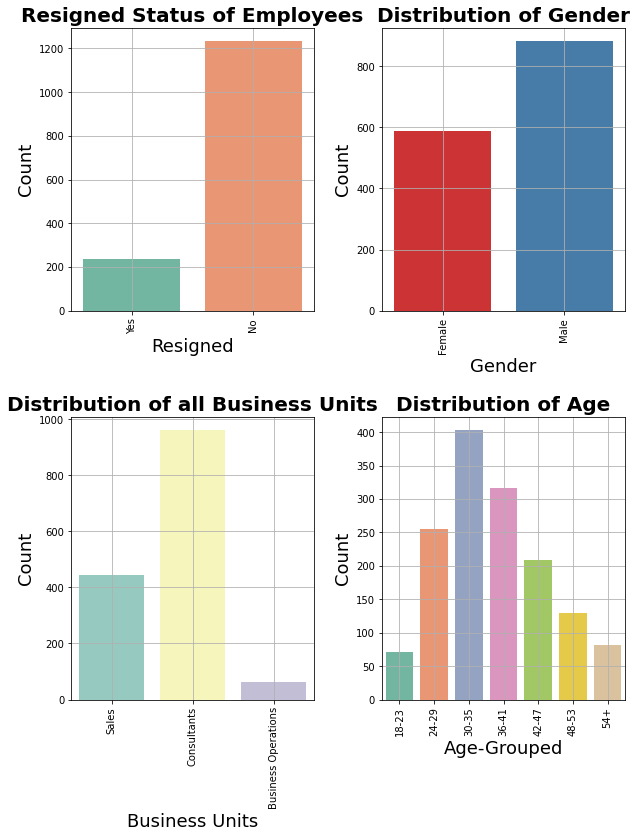

In [8]:
# Plot all four qualitative graphs next to each other
fig, axes = plt.subplots(2, 2, figsize=(9,12))
# Plot the graphs using our function plot_data()
plot_data(dataset=df, column='Resigned', title='Resigned Status of Employees',ax=axes[0,0])
plot_data(df,column='Gender',title = 'Distribution of Gender',palette='Set1',ax=axes[0,1])
plot_data(df, column='BusinessUnit', xlabel='Business Units',title = 'Distribution of all Business Units', palette='Set3',ax=axes[1,0])
plot_data(df, column='Age_Grouped', xlabel='Age-Grouped',title='Distribution of Age', ax=axes[1,1])
plt.show()

In [9]:
# Calculate the distribution of values
percent_resigned = (df['Resigned'].value_counts().values[1] / df['Resigned'].value_counts().sum())*100
percent_gender = (df['Gender'].value_counts().values[0] / df['Gender'].value_counts().sum())*100
percent_business_unit = (df['BusinessUnit'].value_counts() / df['BusinessUnit'].value_counts().sum()*100)
# Print the answer
print(f'Status of Employees:\nOur first visualisation shows that {percent_resigned:.2f}% of employees resigned in the \nCompany.\n')
print(f'Distribution of Gender:\nThe second plot shows that {percent_gender:.2f}% of the employees are Male.\n')
print(f'Business Units:\nLastly, we see that {percent_business_unit.values[0]:.2f}% of all employees work in Consulting, {percent_business_unit.values[1]:.2f}% in Sales and {percent_business_unit.values[2]:.2f}% in Business Operations.\n')
print(f"Age:\n50% of all employees are younger than {df['Age'].median():.0f} years.")

Status of Employees:
Our first visualisation shows that 16.12% of employees resigned in the 
Company.

Distribution of Gender:
The second plot shows that 60.00% of the employees are Male.

Business Units:
Lastly, we see that 65.37% of all employees work in Consulting, 30.34% in Sales and 4.29% in Business Operations.

Age:
50% of all employees are younger than 36 years.


### 1.1.2 Visualising all ordinal data

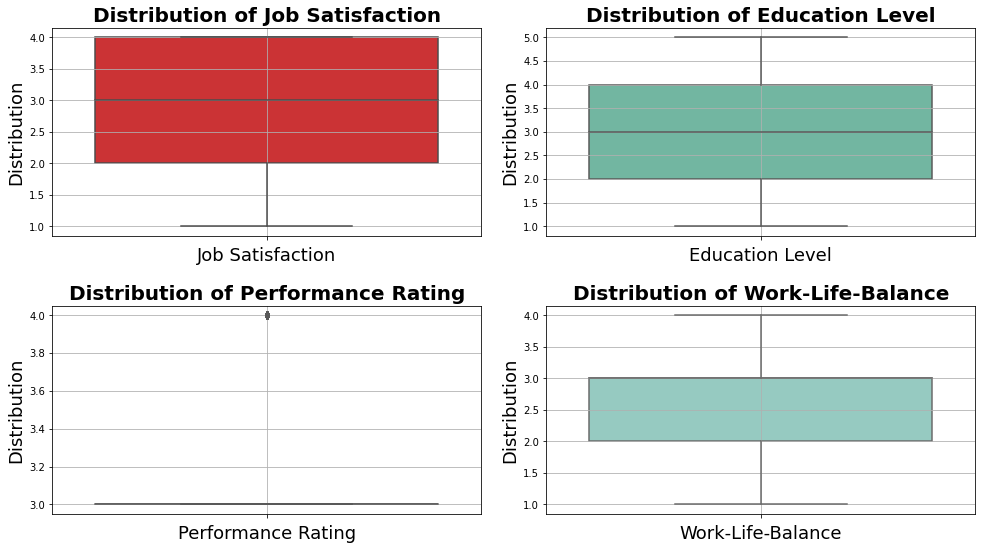

In [10]:
# Visualise the plots 2 by 2
fig, axes = plt.subplots(2, 2, figsize=(14,8))
# Display the summary statistics of all ordinal columns
plot_data(dataset=df, column='JobSatisfaction',kind='box', ylabel='Distribution',ax=axes[0,0], palette='Set1', xlabel='Job Satisfaction', title='Distribution of Job Satisfaction')
plot_data(dataset=df, column='EducationLevel',kind='box', ylabel='Distribution', ax=axes[0,1], xlabel='Education Level', title='Distribution of Education Level')
plot_data(dataset=df, column='PerformanceRating',kind='box', ylabel='Distribution', ax=axes[1,0], xlabel='Performance Rating',title='Distribution of Performance Rating')
plot_data(dataset=df, column='WorkLifeBalance',kind='box', ylabel='Distribution', xlabel='Work-Life-Balance',title='Distribution of Work-Life-Balance', ax=axes[1,1],palette='Set3')
plt.tight_layout(pad=2.0)
plt.show()

In [11]:
# Explore why 25% have a Job Satisfaction of 25% and lower
custom_percentile = np.linspace(0,1, num=int(1/0.125)+1)
df[['JobSatisfaction','EducationLevel','PerformanceRating','WorkLifeBalance']].describe(percentiles=custom_percentile)

,JobSatisfaction,EducationLevel,PerformanceRating,WorkLifeBalance
count,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.728571,2.912925,3.153741,2.761224
std,1.102846,1.024165,0.360824,0.706476
min,1.000000,1.000000,3.000000,1.000000
0%,1.000000,1.000000,3.000000,1.000000
12.5%,1.000000,2.000000,3.000000,2.000000
25%,2.000000,2.000000,3.000000,2.000000
37.5%,2.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000
62.5%,3.000000,3.000000,3.000000,3.000000


In [12]:
# Saving the key observations in a variable
percent_employee_at_risk = (df[df['JobSatisfaction'] == 1].count().mode()[0] / df['JobSatisfaction'].count())*100
education_mean = df['EducationLevel'].mean()
high_performing_employees = (df[df['PerformanceRating'] == 4].count().mode()[0] / df['PerformanceRating'].count())*100
# Printing the result
print(f'Job Satisfaction:\nThe summary statistic shows, many employees are at risk of quitting their job, \
{percent_employee_at_risk:.2f}% are very unsatified with their current job.\n')
print(f'Education Levels:\nAre almost representing a perfect standard distribution in our organisation, 25% are between 1.0 and 2.0, 50% between 2.0 and 3.0 and another 25% between 3.0 and 5.0.\
 The average Level sits at {education_mean:.2f} points.\n')
print(f'Performance Rating:\nThe statistics shows that over 75% of all employees are perfoming the same, 3.0. Only {high_performing_employees:.2f}% of all 1470 employees are performing a bit better,\n4.0.')

Job Satisfaction:
The summary statistic shows, many employees are at risk of quitting their job, 19.66% are very unsatified with their current job.

Education Levels:
Are almost representing a perfect standard distribution in our organisation, 25% are between 1.0 and 2.0, 50% between 2.0 and 3.0 and another 25% between 3.0 and 5.0. The average Level sits at 2.91 points.

Performance Rating:
The statistics shows that over 75% of all employees are perfoming the same, 3.0. Only 15.37% of all 1470 employees are performing a bit better,
4.0.


### 1.1.3 Visualising all continuous variables

In this section, we will further analyise Average Weekly Hours Worked and Monthly Income.

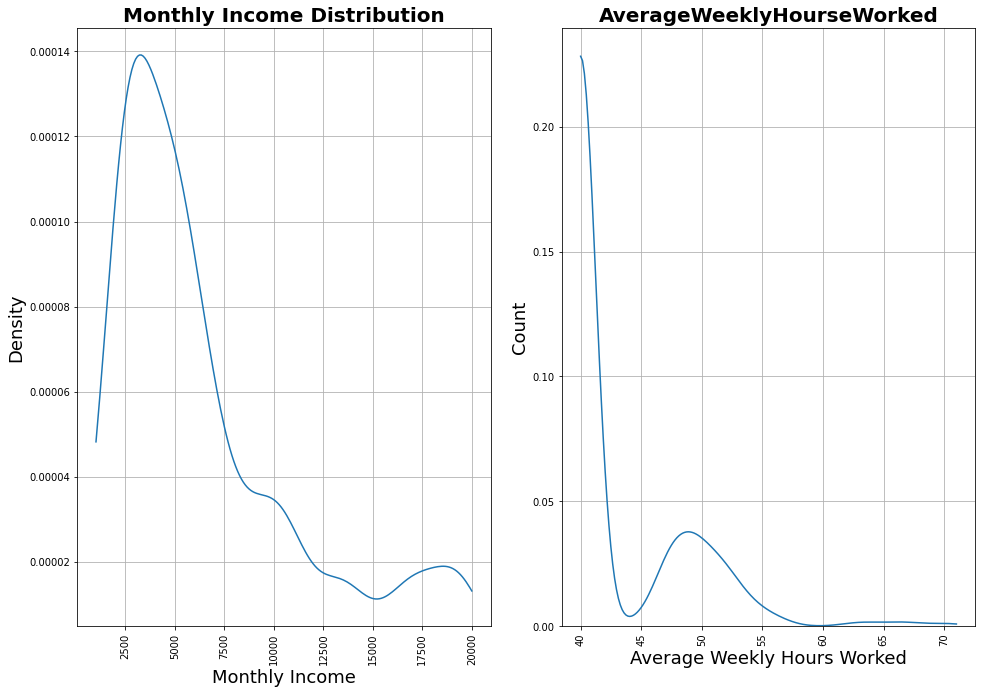

In [13]:
# Visualise the plots 2 by 2
fig, axes = plt.subplots(1, 2, figsize=(14,10))
# Display the kde plots of all continuous columns
plot_data(df, column='MonthlyIncome', title='Monthly Income Distribution', kind='kde',ylabel='Density',ax=axes[0], xlabel='Monthly Income')
plot_data(df, column='AverageWeeklyHoursWorked', title='AverageWeeklyHourseWorked',kind='kde',ax=axes[1], xlabel = 'Average Weekly Hours Worked')

In [14]:
df[['MonthlyIncome','AverageWeeklyHoursWorked']].describe(percentiles=custom_percentile)

,MonthlyIncome,AverageWeeklyHoursWorked
count,1470.000000,1470.000000
mean,6502.931293,43.042177
std,4707.956783,5.389864
min,1009.000000,40.000000
0%,1009.000000,40.000000
12.5%,2378.250000,40.000000
25%,2911.000000,40.000000
37.5%,4030.625000,40.000000
50%,4919.000000,40.000000
62.5%,6078.750000,40.000000


In [15]:
# Simple statistics
median_income = df['MonthlyIncome'].median()
mean_income = df['MonthlyIncome'].mean()
# Percent of how many employees work above 40 hours a week on average
df_Average_Weekly_HW = df['AverageWeeklyHoursWorked'].value_counts().reset_index()
df_Average_Weekly_HW.columns = ['WeeklyHoursWorked','Count']
employee_working_long_shift = df_Average_Weekly_HW[df_Average_Weekly_HW['WeeklyHoursWorked'] > 40]['Count'].sum()
employee_working_long_shift_count = (employee_working_long_shift / df['AverageWeeklyHoursWorked'].count())*100
# Print the findings
print(f'Monthly Income Distribution:\nThe KDE plot shows a significant skew towards lower incomes. While the average income of {mean_income:.2f}$ looks quite strong, the summary statistics shows that we have a lot of outliers earning above 15k$ per month. The median Monthly Income is {median_income}$ and suggest that income disparaties exist within the company.\n') 
print(f'Average Weekly Hours Worked:\nThe distribution shows that most employees work around 40 hours, but the KDE plot reveals a long tail indicating a lot of employees work longer hours. {employee_working_long_shift_count:.1f}% work above 40 hours a week on average.')

Monthly Income Distribution:
The KDE plot shows a significant skew towards lower incomes. While the average income of 6502.93$ looks quite strong, the summary statistics shows that we have a lot of outliers earning above 15k$ per month. The median Monthly Income is 4919.0$ and suggest that income disparaties exist within the company.

Average Weekly Hours Worked:
The distribution shows that most employees work around 40 hours, but the KDE plot reveals a long tail indicating a lot of employees work longer hours. 28.3% work above 40 hours a week on average.


### 1.2 Explore relationships between all pairs of attributes using a graph

This second part of our EDA focuses on deeper analysis of at least ten columns to identify their relationships and correlations. I will explain further, how the correlations help our management to target strategies to retain top talent and reduce turnover. First, we define a function that checks relationship and correlation between two variabales.

In [16]:
# We define the function
def plot_relation_data(dataset, x_col, y_col, kind='scatter',title=None, xlabel=None, ylabel=None, palette='Set2', ax=None, hue=None, size=None):
    # Define the plots
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,6))
    
    if kind == 'scatter':
        sns.scatterplot(data=dataset, x=x_col, y=y_col, hue=hue, palette=palette, ax=ax, alpha = 0.7, size=size)
    elif kind == 'box':
        sns.boxplot(data=dataset, x=x_col, y=y_col, hue=hue, palette=palette, ax=ax)
    elif kind == 'bar':
        sns.barplot(data=dataset, x=x_col, y=y_col, hue=hue, palette=palette, ax=ax)
    elif kind == 'kde':
        sns.kdeplot(data=dataset, x=x_col, y=y_col, cut=0, palette=palette, ax=ax)
    elif kind == 'violin':
        sns.violinplot(data=dataset, x=x_col, y=y_col,hue=hue, palette=palette, bw=0.5, split=True, scale = 'area', ax=ax)
    elif kind == 'line':
        sns.lineplot(data=dataset, x=x_col, y=y_col, hue=hue, style=hue, palette=palette, ax=ax, marker='o', markersize=8, ci=None)
    elif kind == 'heatmap':
        sns.heatmap(data=dataset, x=x_col, y=y_col, palette=palette, ax=ax, cmap='coolwarm', annot=True, linewidths=0.5)
    else:
        raise ValueError(f'Plot kind {kind} does not work, supported are "scatter", "box", "bar", "kde", "violin", "heatmap", or "line".')
    # Setting the title, oabels and grid
    if title is None:
        title = f'Relationship of {x_col} and {y_col}'
    if xlabel is None:
        xlabel = x_col
    if ylabel is None:
        ylabel = y_col
    # Customisation    
    ax.set_title(title, fontsize=20, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=18)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.tick_params(axis='x', rotation=90)  
    ax.grid(True)
    if hue is not None:
        ax.legend(title=hue, loc='best', fontsize=12)
    plt.tight_layout(pad=2.0)

### 1.2.1 Who is generally most likely to quit?

The below visualisations helps to understand which employees of what Income Group are more likely to quit and who is generally more effected by employee turnover.

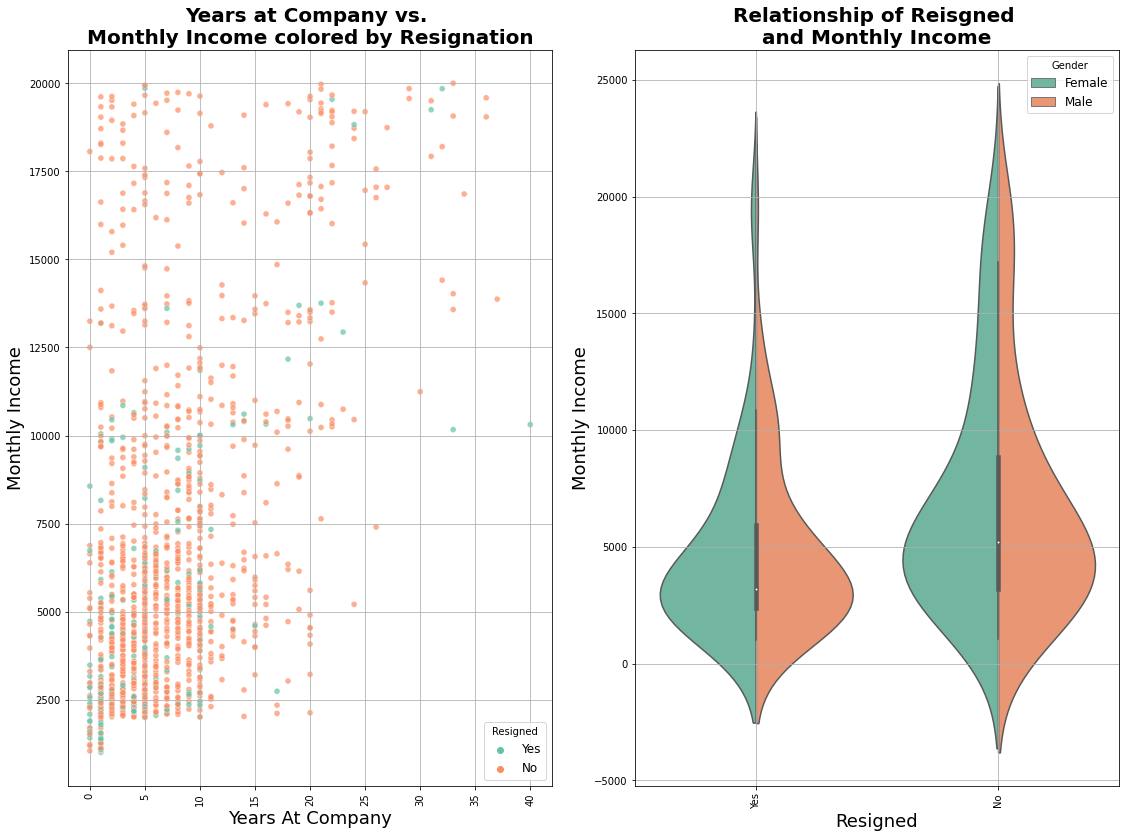

In [17]:
# Plot two graphs next to each other
fig, axes = plt.subplots(1, 2, figsize=(16,12))
# Define the graph using our function plot_relation_data()
plot_relation_data(df, x_col='YearsAtCompany', y_col='MonthlyIncome', hue='Resigned', title='Years at Company vs. \nMonthly Income colored by Resignation', ax=axes[0],ylabel='Monthly Income', xlabel='Years At Company')
plot_relation_data(df, x_col='Resigned', y_col='MonthlyIncome',hue='Gender', kind='violin', ax=axes[1], title='Relationship of Reisgned \nand Monthly Income', ylabel='Monthly Income')

The plots identicate that employees who resigned are primarily clustered in the lower income range and new to the company (0-5 years). The violin plot on the right supports this statement, showing a higher concentration of resignations among lower-income groups, while the gender of employees is fairly even distributed. In contrast, employees who stayed tend to have a broader income distribution, implying that higher income plays a role in retaining employees. 

### 1.2.2 Highlight disparities in pay between different age groups/ genders

The below will delve deeper into the disparities in pay beetween different age groups and genders. The goal is to analyse if a gender pay gap or age pay gap exist.

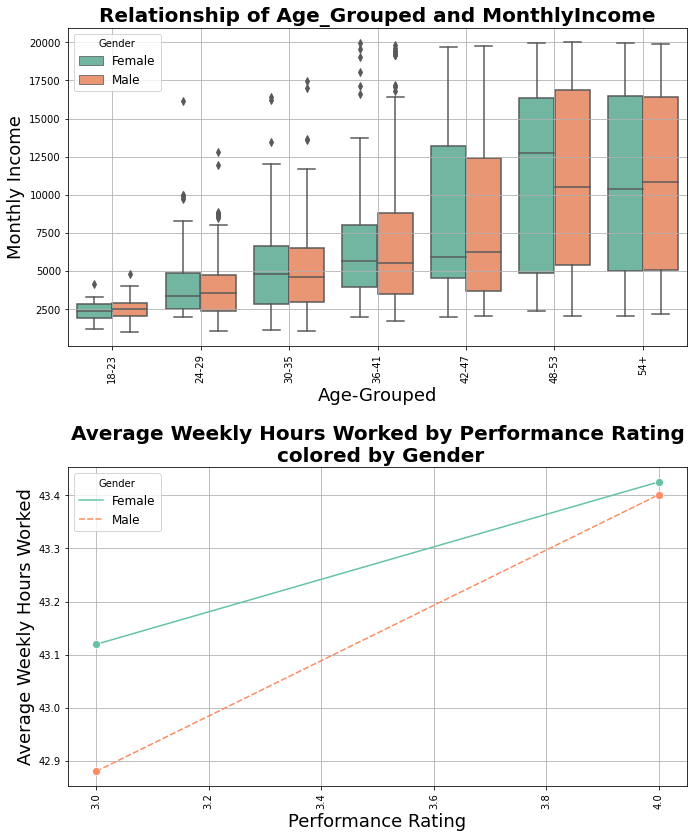

In [18]:
# Plot two graphs simultaneously
fig, axes = plt.subplots(2, 1, figsize=(10,12))
# Plot
plot_relation_data(df, x_col='Age_Grouped', y_col='MonthlyIncome',hue='Gender', kind='box', ax=axes[0], ylabel='Monthly Income', xlabel='Age-Grouped')
plot_relation_data(df, x_col='PerformanceRating', y_col='AverageWeeklyHoursWorked', hue='Gender', title='Average Weekly Hours Worked by Performance Rating\n colored by Gender',kind='line', ax=axes[1], ylabel='Average Weekly Hours Worked', xlabel='Performance Rating')

The analysis reveals disparities in pay across different age groups and genders. The box plot shows that the median monthly income increases with age, with older age groups earning considerably more than younger groups. In addition to this, within each age group a gender pay gap is also evident, with male employees generally earning more than their femals coutnerparts, especially in higher age brackets. We use a line plot to explore the relationship between performance rating and average weekly hours by gender, to see if any performance related variables explain the income difference between the genders. As the plot shows a weak correlation suggests that other factors influence the gender pay gap. This could be demotivating for the female employees as their performance is not being taking into consideration. Consultant Revolut could implement transparent pay structures to reduce biases and ensure that employees are compensated fairly for their role.

### 1.2.3 Employees who are likely to churn vs. Satisfied employees

This section further explores if employees are more likely to churn due to a lack of carrer progession and also what group of employees are not at risk and do not need to be further focused on.

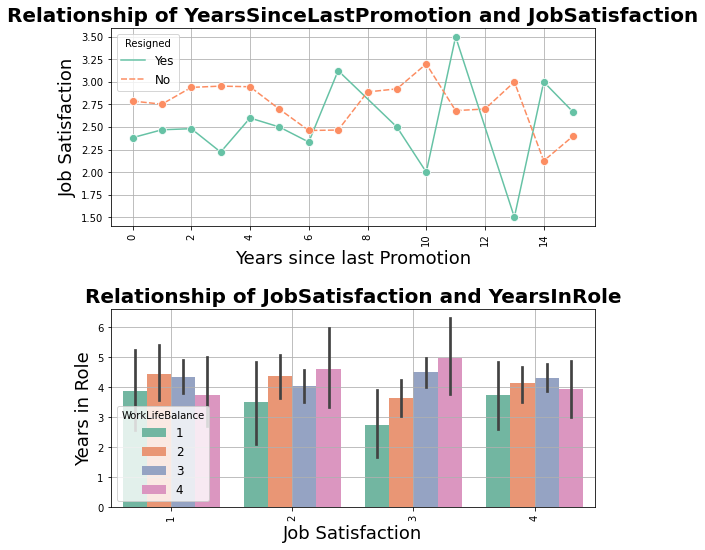

In [19]:
fig, axes = plt.subplots(2,1,figsize=(8,8))
plot_relation_data(df, x_col='YearsSinceLastPromotion', y_col='JobSatisfaction',hue='Resigned',kind='line', ax=axes[0], xlabel='Years since last Promotion', ylabel='Job Satisfaction')
plot_relation_data(df, x_col='JobSatisfaction', y_col='YearsInRole',hue='WorkLifeBalance', kind='bar', ax=axes[1], xlabel = 'Job Satisfaction', ylabel = 'Years in Role')

The lineplot shows if there is any relationship between `YearsSinceLastPromotion` and `JobSatisfaction`. It indicates that employees who haven't been promoted for over five years often experience declining job satisfaction, especially when considering the second line of people who already resigned. As insufficient career progression is a driver of employee turnover, the HR department must implement a structured career development progam or enhance performance recognition to boost employees job satisfaction and to reduce the risk of turnover.

The barplot confirms that employees with higher job satisfaction in their role are generally stable and less likely to churn, especially when they have a good work-life balance. The focus should be on those employees who struggle to keep a good balance between work and their private life by enhancing programs, such as flexible working hours, remote work options or even wellness programs if someone performed really well. 

### 1.2.4 Reduce turnover of new employees due to lack of pay

Lastly, management reviewed that newer employees might leave due to concerns about pay and work-life-balance. The below boxplot analysis the relationship between all three variables. The graph focuses on employees with `YearsInRole` ranging from 0 to 2 years, displaying the population of new employees.

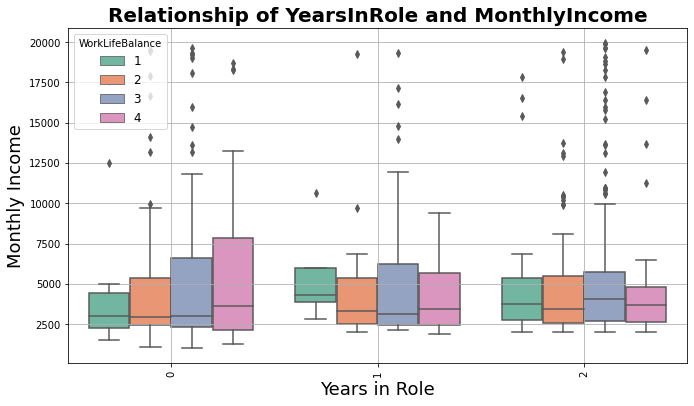

In [20]:
# Filter new Employees with Years in Role <= 3 years
filtered_df = df[(df['YearsInRole'] >= 0) & (df['YearsInRole'] <=2)]
plot_relation_data(filtered_df, x_col='YearsInRole', y_col='MonthlyIncome', hue='WorkLifeBalance', kind='box', xlabel = 'Years in Role', ylabel = 'Monthly Income')

The boxplot reveals a noticable variation in `MonthlyIncome` across different levels of `WorkLifeBalance`. Employees who just startet their role, also experience a wide spread in `MonthlyIncome`, with some earning significantly more than others. This income disparities may contribute to dissatisfaction and potential turnover, particularly for lower earners. Employees with low work-life balance ratings who also earn less may be at higher risk of leaving. A solution for management should be to ensure transparecny in compensation and to avoid inequities, especially among new hiers. Monitoring these employees and providing targeted support could reduce turnover risks.

### 1.2.5 Engagement within the company

Our management is worried that the performance of our consultants drops within the last couple of months. The below visualisations take performance related variables into account and analyses their relationship.

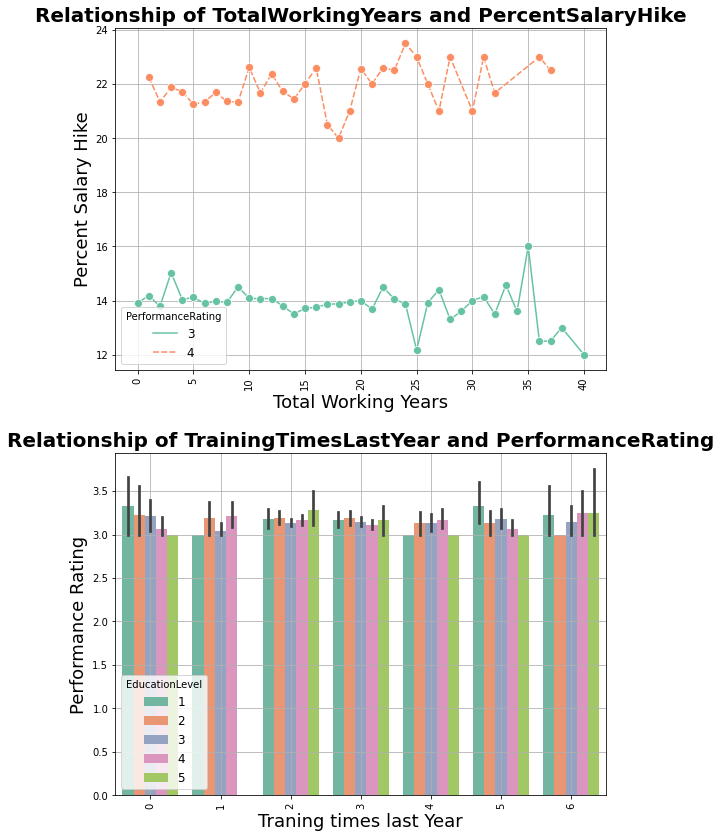

In [21]:
fig, axes = plt.subplots(2,1,figsize=(8,12))
plot_relation_data(df, x_col='TotalWorkingYears', y_col='PercentSalaryHike', kind='line', hue='PerformanceRating', ax=axes[0], xlabel = 'Total Working Years', ylabel = 'Percent Salary Hike')
plot_relation_data(df, x_col='TrainingTimesLastYear', y_col='PerformanceRating',hue='EducationLevel', kind='bar', ax=axes[1], xlabel = 'Traning times last Year', ylabel = 'Performance Rating')

In [22]:
# Calcluate low all employees of low EDU level but high PERFORMANCE
low_education_high_performance = df[(df['EducationLevel']==1) & (df['PerformanceRating']==4)]
all_high_performing = df[df['PerformanceRating'] == 4]
perc_low_edu_high_perf = (len(low_education_high_performance)) / (len(all_high_performing))*100
# Display the result
print(f"NOTE: We saw earlier that only {high_performing_employees:.2f}% of all {len(df)} employees are within Performance Rating 4.0! It is important to note that {perc_low_edu_high_perf:.2f}% of {len(all_high_performing)} high performing employees are within Education Level 1.")

NOTE: We saw earlier that only 15.37% of all 1470 employees are within Performance Rating 4.0! It is important to note that 13.27% of 226 high performing employees are within Education Level 1.


Our first lineplot shows that employees with a higher performance rating (4) consistently receive better salary increases compared to those with a rating of 3. The second plot reveals minimal differences in performance ratings based on the number of trianing sessions attended, with slight variations across education levels. This insight could demotivate employees to attend Training Session due to their irrelevance. Our management should implement more training programs and ensure that salary hikes are more distributed among high performers to sustain motivation.

### 1.2.6 Correlation between JobSatisfaction and OverTime

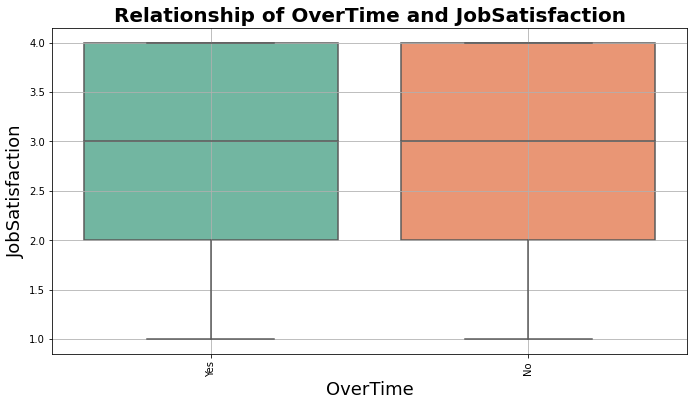

In [23]:
df_overtime_jobsat = df[['OverTime','JobSatisfaction']]
plot_relation_data(df_overtime_jobsat, x_col='OverTime',y_col='JobSatisfaction', kind='box')

The simple visualisation of OverTime and JobSatisfaction does not have any relation to each other.

### 1.2.7 Correlation between all analysed variables

Let's quickly consider the correlation between all visualised variables to effectly identify key variable relationships.

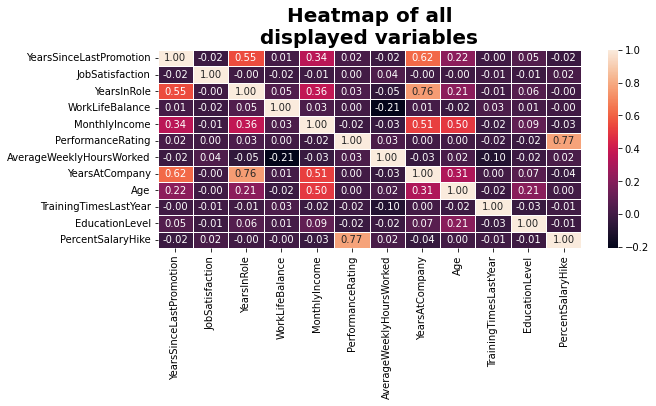

In [24]:
# Create a subset variable with all used columns correlations
corr_data = df[['YearsSinceLastPromotion','JobSatisfaction','Resigned','YearsInRole','WorkLifeBalance','MonthlyIncome','PerformanceRating','AverageWeeklyHoursWorked','Gender','YearsAtCompany','Age','TrainingTimesLastYear','EducationLevel','PercentSalaryHike','OverTime']].corr()

# Visualise a Heatmap representing all Correlations/Relationships
plot_data(corr_data, column=None, kind='heatmap', ylabel = '', title = 'Heatmap of all\ndisplayed variables')

The heatmap revelas key correlations that align with our earlier visualisations. The strongest is between `YearsAtCompany` and `YearsInRole` (0.76), showing that employees who stay longer at Consulting Revolut tend to reamin in the same role for extended periods.  This was evident in our analysis of job satisfaction and years in company, where longer tenure often correlated with higher satisfaction. The correlation also show that employee who remain in the same role without promotion (`YearInRole` and `YearsSinceLastPromotion`, 0.55) are at risk of dissatisfaction and turnover. Additionally to this, long-tenured employees tend to experience fewer promotions (`YearsAtCompany` and `YearsSinceLastPromotion`, 0.62). Lastly, the plot shows a positive correlation between `MontlyIncome` and `Age` (0.50) suggesting that older employees generally earn higher salaries.

Next, we will continue with Data Modelling.

## 2. Data Modelling
### 2.1 Modelling functions to model and visualise the data using KMeans
#### 2.1.1 Prepare the dataset

We define a function to transform our data by sclaing each feature to a specific range (between 0 and 1), using MinMaxScaler. It ensures all features contribute equally to the analysis.

In [25]:
# Function to standardize a dataset to equal data ranges
def minmax_(dataset):
    scaler = MinMaxScaler()
    minmax_df = scaler.fit_transform(dataset)
    return pd.DataFrame(minmax_df, columns=dataset.columns)

We map numerical values to our categorical features so we can include them in our data modelling. We also exclude EmployeeID, Resigned and Age_Grouped as those features don't offer valuable insights or contain the answer (here: Resigned). We standardise the dataset df_1.

In [26]:
# Convert categorical features into numerical ones
df['BusinessTravel'] = df['BusinessTravel'].map({"Non-Travel":0, "Travel_Rarely":1, "Travel_Frequently":2})
df['BusinessUnit'] = df['BusinessUnit'].map({'Business Operations':0, 'Sales':1, 'Consultants':2})
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single':0, 'Divorced':1, 'Married':2})
df['OverTime'] = df['OverTime'].map({'No':0,'Yes':1})
# Create a dataframe copy
df_1 = df.copy()
# Drop unnecssary columns
df_1.drop(columns=['EmployeeID','Resigned','Age_Grouped'], inplace=True)
# Standardise the data first using MinMaxScaler
df_1 = minmax_(df_1)

#### 2.1.2 Functions for KMeans Model evaluation WCSS and Silhouette Score

We define a function that can model the KMeans evaluation method WCSS and Silhouette Score to identift the optimal cluster (k-value). Our function plots the result in a graph.

In [27]:
# Function to plot WCSS and Silhouette Score next to each other
def intrinsic_evaluation_wcss_silhouette(df, k_range=range(2,22)):
    # Apply MinMax scaling
    df = minmax_(df)
    # Empty list holding inertia value and silhouette coefficients for each k
    inertia_lst = []
    silhouette_coefficients = []
    # WCSS model
    for k in k_range:
        km_model = KMeans(n_clusters=k, random_state=30)
        km_model.fit(df)
        inertia_lst.append(km_model.inertia_)
    
        score = silhouette_score(df, km_model.labels_)
        silhouette_coefficients.append(score)
    
    plt.figure(figsize=(12,8))
    # First plot WCSS
    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertia_lst, marker='o')
    plt.xticks(k_range)
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('Inertia', fontsize=14)
    plt.title('Elbow Method for optiomal k', fontsize=18, fontweight='bold')
    plt.grid()
    # Second plot silhouette coeffiencts
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouette_coefficients, marker='o')
    plt.xticks(k_range)
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('Silhouette Coefficient', fontsize=14)
    plt.title('Silhouette Coefficient for optiomal k', fontsize=18, fontweight='bold')
    plt.grid()
    # Show graph
    plt.tight_layout
    plt.show()

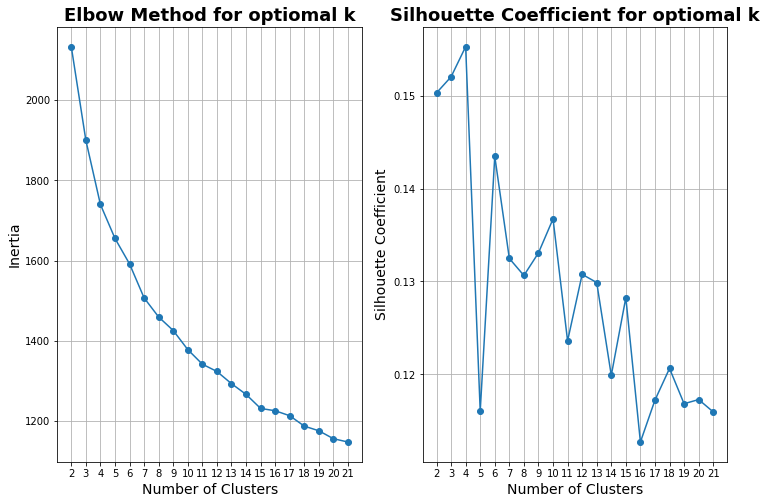

In [28]:
# Apply the function to identify the correct k value
intrinsic_evaluation_wcss_silhouette(df_1)

As the 'elbow point' of the WCSS graph is difficult to identify, we also use the Silhouette Coefficient. The Silhouette Coefficient has an optiomal number of clusters, within the Elbow Point of WCSS, at the value of 6.

#### 2.1.3 KMeans with optimal k=6

We model our prepared dataframe using the optimal value k=6.

In [29]:
# KMeans Model using the optimal k = 6
km_1 = KMeans(n_clusters=6, random_state=30)
df_1['Cluster'] = km_1.fit_predict(df_1)
# Add the Resigned Column
df['Resigned'] = df['Resigned'].map({'Yes':1, 'No':0})
df_1['Resigned'] = df['Resigned']

We readd the feature Resigned to identify the Resignation Rate of each cluster. It is important to note that the model performed the cluster identification without the knowledge of column Resigned.

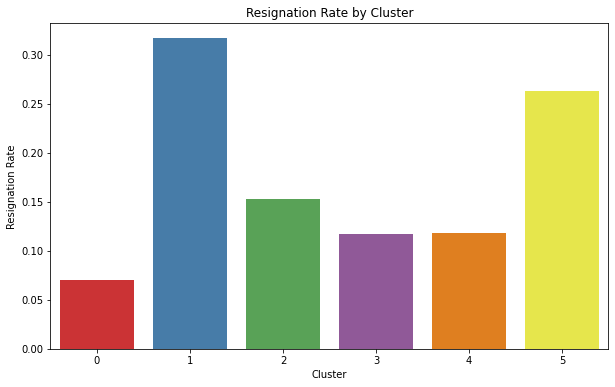

In [30]:
# Compare the resignation rate in different clusters
resignation_rate = df_1.groupby('Cluster')['Resigned'].mean()
# Plot the resignation rate
plt.figure(figsize=(10,6))
sns.barplot(x=resignation_rate.index, y=resignation_rate.values, palette='Set1')
plt.xlabel('Cluster')
plt.ylabel('Resignation Rate')
plt.title('Resignation Rate by Cluster')
plt.show()

Blue and Yellow are the both most significant clusters of employee resignation.

#### Further exploration of Cluster 1 with the highest Resignation Rate

The below will now create another function to visualise column pairs of the modelled dataset.

In [31]:
# Function to visualise the clusters with different feature pairs
def plot_data(df, hue=None, centres=None):
    # Plot a scatterplot for the features pairs
    plt.figure(figsize=(10,8))
    sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], palette='Set1', alpha=0.8, hue=hue)
    # Plot the centres
    if centres is not None:
        sns.scatterplot(x=centres[:,0], y=centres[:,1], s=500, hue=range(centres.shape[0], legend=False, marker='X'))
    xlabel = df.columns[0]
    ylabel = df.columns[1]
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(f'{ylabel} vs {xlabel}', fontsize=18, fontweight='bold')
    plt.grid()
    plt.show()

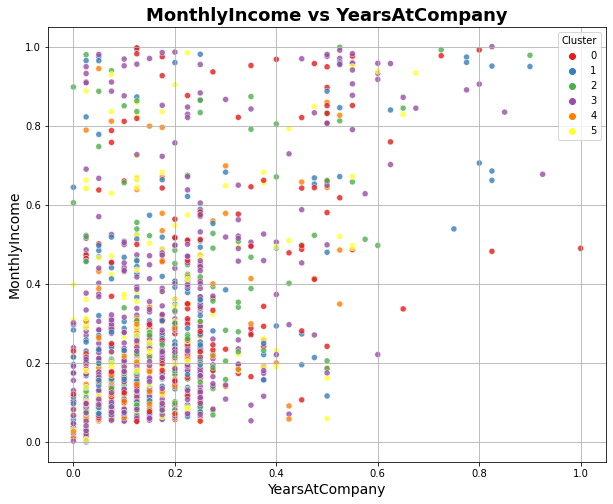

In [32]:
# YearsAtCompany vs MonthlyIncome
df_subset1 = df_1[['YearsAtCompany', 'MonthlyIncome']]
plot_data(df_subset1, hue=(df_1['Cluster']))

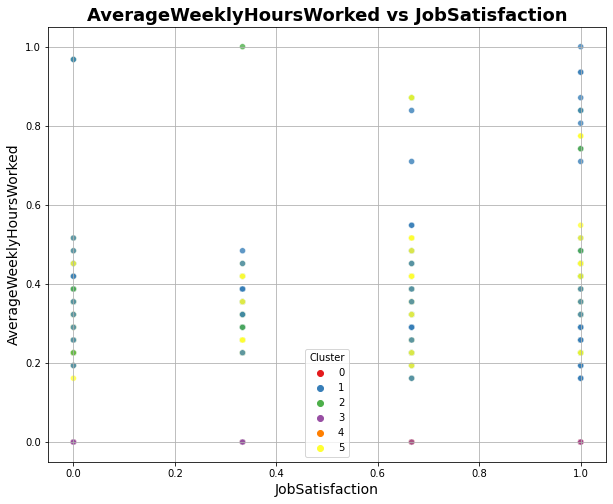

In [33]:
# JobSatisfaction vs WorkLifeBalance
df_subset2 = df_1[['JobSatisfaction', 'AverageWeeklyHoursWorked']]
plot_data(df_subset2, hue=(df_1['Cluster']))

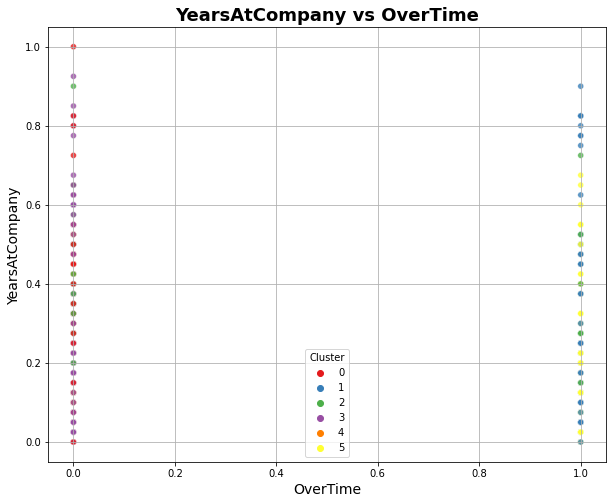

In [34]:
# OverTime vs YearsAtCompany
df_subset3 = df_1[['OverTime', 'YearsAtCompany']]
plot_data(df_subset3, hue=(df_1['Cluster']))

In [35]:
# Reminder 0 represents Female, 1 represents Male
df_1['Gender'].value_counts()

1.0    882
0.0    588
Name: Gender, dtype: int64

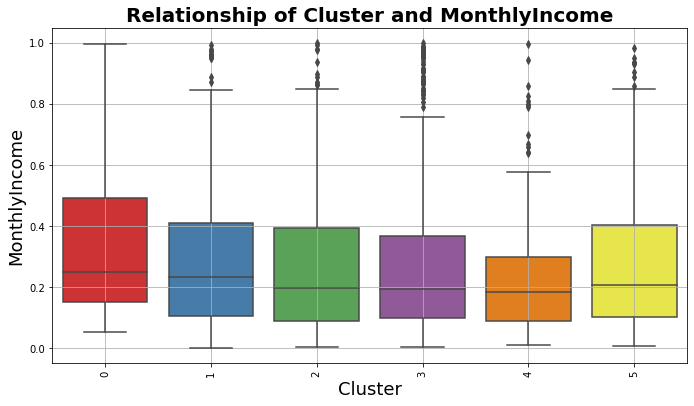

In [36]:
# MonthlyIncome vs Cluster
df_subset4 = df_1[['Cluster','MonthlyIncome']]
plot_relation_data(df_subset4, x_col='Cluster',y_col='MonthlyIncome',kind='box', palette='Set1')

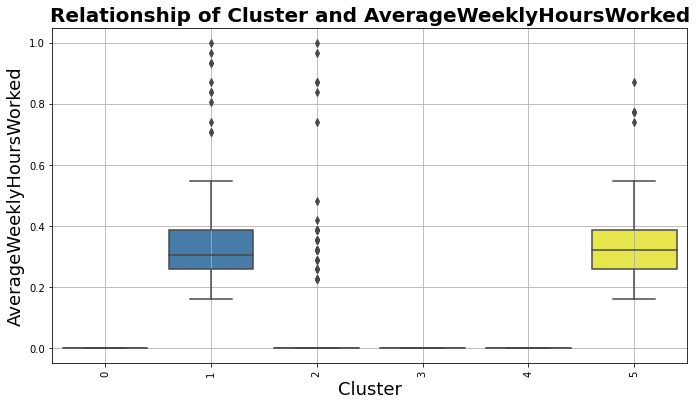

In [37]:
# Average Weekly Hours Worked by Cluster
df_subset5 = df_1[['Cluster','AverageWeeklyHoursWorked']]
plot_relation_data(df_subset5, kind='box', x_col='Cluster',y_col='AverageWeeklyHoursWorked', palette='Set1')

#### 2.1.3 KMeans with higher k=10

In [38]:
# Create a dataframe copy
df_1_higher_k = df.copy()
# Drop unnecssary columns
df_1_higher_k.drop(columns=['EmployeeID','Resigned','Age_Grouped'], inplace=True)
# Standardise the data first using MinMaxScaler
df_1_higher_k = minmax_(df_1_higher_k)

In [39]:
# KMeans Model using the optimal k = 6
km_1_higher_k = KMeans(n_clusters=10, random_state=30)
df_1_higher_k['Cluster'] = km_1_higher_k.fit_predict(df_1_higher_k)
# Add the Resigned Column
df_1_higher_k['Resigned'] = df['Resigned']

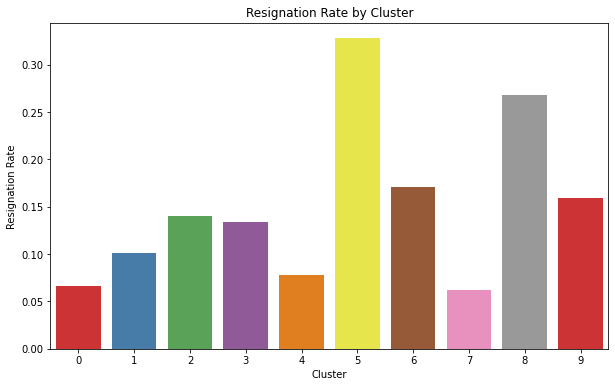

In [40]:
# Compare the resignation rate in different clusters
resignation_rate_higher_k = df_1_higher_k.groupby('Cluster')['Resigned'].mean()
# Plot the resignation rate
plt.figure(figsize=(10,6))
sns.barplot(x=resignation_rate_higher_k.index, y=resignation_rate_higher_k.values, palette='Set1')
plt.xlabel('Cluster')
plt.ylabel('Resignation Rate')
plt.title('Resignation Rate by Cluster')
plt.show()

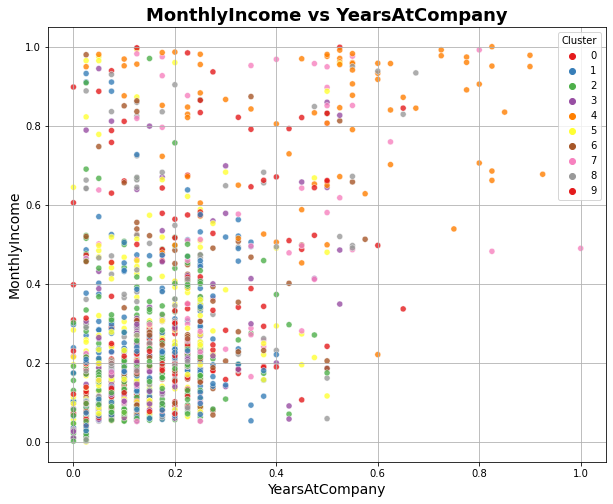

In [41]:
# YearsAtCompany vs MonthlyIncome
df_subset1_higher_k = df_1_higher_k[['YearsAtCompany', 'MonthlyIncome']]
plot_data(df_subset1_higher_k, hue=(df_1_higher_k['Cluster']))

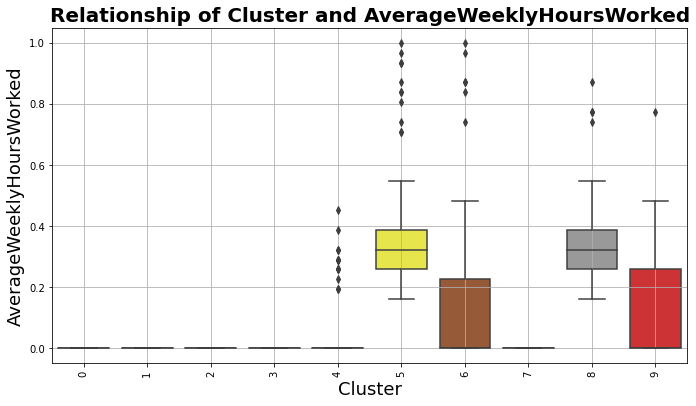

In [42]:
# Average Weekly Hours Worked by Cluster
df_subset5_higher_k = df_1_higher_k[['Cluster','AverageWeeklyHoursWorked']]
plot_relation_data(df_subset5_higher_k, kind='box', x_col='Cluster',y_col='AverageWeeklyHoursWorked', palette='Set1')

<b>All insights will be shared in the report</b>.

### 2.2 Modelling functions to model and visualise the data using DBSCAN
#### 2.2.1 Function for eps evaluation DBSCAN

Before applying DBSCAN, we need to determine an appropriate `eps` value by plotting the k-th nearest neighbour distance. For DBSCAN, we need to do some parts of modelling evaluation before the acutal modelling, as it is very hard and inefficient to just guess the eps value. `k=5` as we calculate the distance to the 5th nearest neighbor.

In [43]:
# Create a new dataframe copy
df_2 = df.copy()
# Drop unnecssary columns
df_2.drop(columns=['EmployeeID','Resigned','Age_Grouped'], inplace=True)
# Standardise the data first using MinMaxScaler
df_2 = minmax_(df_2)

In [44]:
# Function to plot kth nearest neighbour
def plot_kth_nn(df, k):
    # Fit the neighbour model
    nbrs = NearestNeighbors(n_neighbors=25)
    nbrs_fit = nbrs.fit(df)
    distances, indices = nbrs_fit.kneighbors(df)
    # Sort
    k_distance = np.sort(distances[:, k-1])
    plt.figure(figsize=(10,6))
    plt.plot(k_distance)
    plt.title(f"{k+1}-th Nearest Neighbor Distance", fontsize=18, fontweight='bold')
    plt.xlabel(f"Sorted by distance", fontsize=14)
    plt.ylabel(f"{k+1}-th Nearest Neighbour Distance", fontsize=14)
    plt.gca().invert_xaxis()
    plt.grid()
    plt.show()

#### 2.2.2 DBSCAN Modelling with optiomal eps

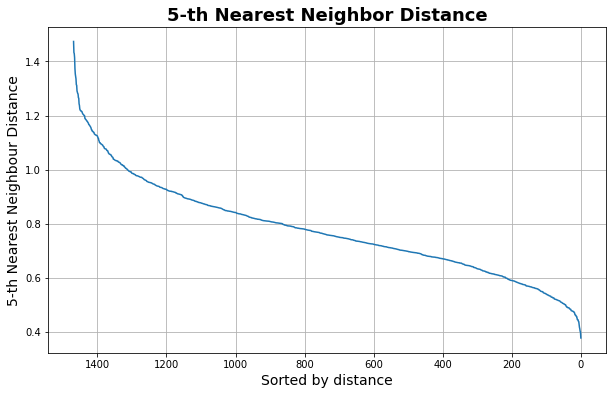

In [45]:
# Plotting kth nearest neigbour to identify the optimal eps value
plot_kth_nn(df_2, k=4)

The above graph visualises another elbow point which identifies that the optimal eps value sits between 1 and 1.1. 

In [46]:
# DBSCAN on our scaled df_2 dataset with the optimal eps value
dbscan_df = DBSCAN(eps=1.07, min_samples=10)
df_2['Cluster'] = dbscan_df.fit_predict(df_2) 

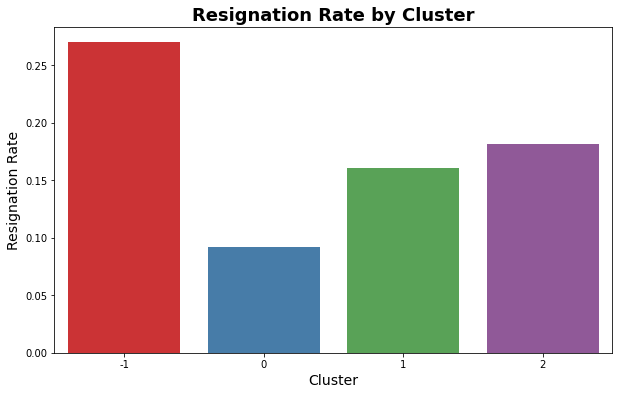

In [47]:
# Add 'Resigned' back to df_2 AFTER DBSCAN modelling
df_2['Resigned'] = df['Resigned']
# Visualise the same results as before to compare modelling techniques
resignation_rate_dbscan = df_2.groupby('Cluster')['Resigned'].mean()
# Plot the resignation rate per cluster
plt.figure(figsize=(10,6))
sns.barplot(x=resignation_rate_dbscan.index, y=resignation_rate_dbscan.values, palette='Set1')
plt.xlabel('Cluster',fontsize=14)
plt.ylabel('Resignation Rate', fontsize=14)
plt.title('Resignation Rate by Cluster',fontsize=18, fontweight='bold')
plt.show()

We can see that DBSCAN identifies less cluster that KMeans.

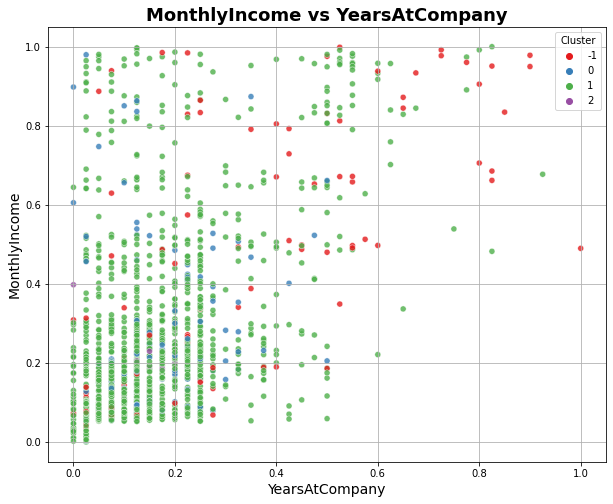

In [48]:
# YearsAtCompany vs MonthlyIncome
df_subset1_dbscan = df_2[['YearsAtCompany', 'MonthlyIncome']]
plot_data(df_subset1_dbscan, hue=(df_2['Cluster']))

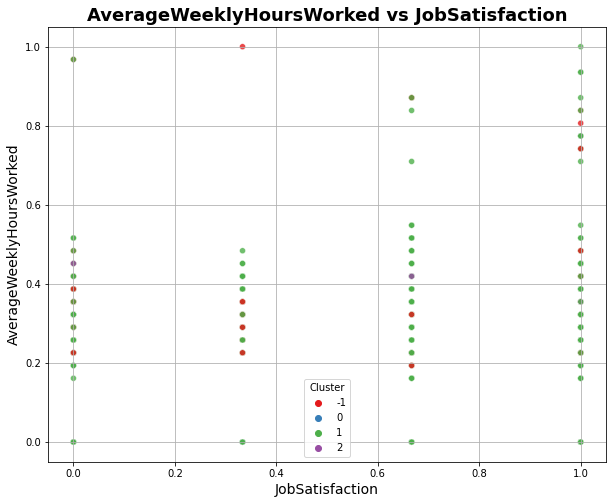

In [49]:
# JobSatisfaction vs WorkLifeBalance
df_subset2_dbscan = df_2[['JobSatisfaction', 'AverageWeeklyHoursWorked']]
plot_data(df_subset2_dbscan, hue=(df_2['Cluster']))

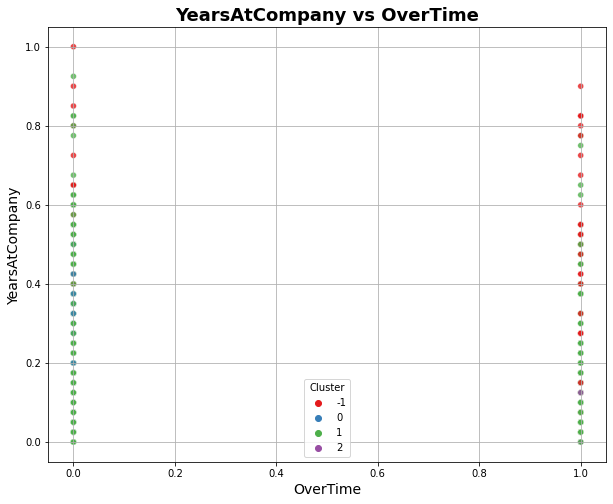

In [50]:
# OverTime vs YearsAtCompany
df_subset3_dbscan = df_2[['OverTime', 'YearsAtCompany']]
plot_data(df_subset3_dbscan, hue=(df_2['Cluster']))

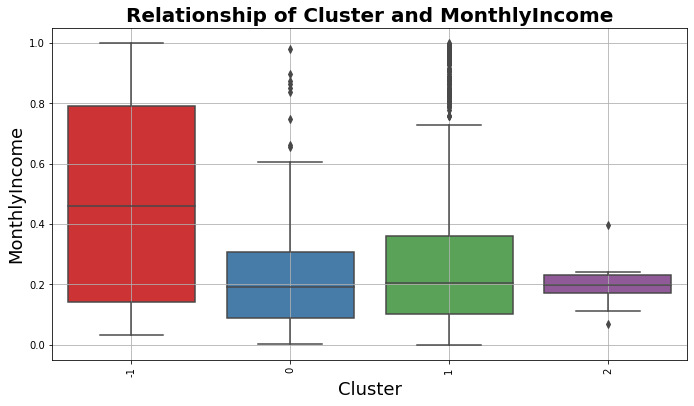

In [51]:
# MonthlyIncome vs Cluster
df_subset4_dbscan = df_2[['Cluster','MonthlyIncome']]
plot_relation_data(df_subset4_dbscan, x_col='Cluster',y_col='MonthlyIncome',kind='box', palette='Set1')

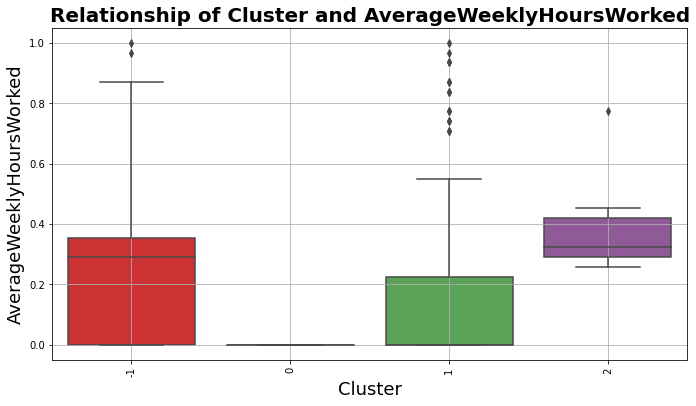

In [52]:
# Average Weekly Hours Worked by Cluster
df_subset5_dbscan = df_2[['Cluster','AverageWeeklyHoursWorked']]
plot_relation_data(df_subset5_dbscan, kind='box', x_col='Cluster',y_col='AverageWeeklyHoursWorked', palette='Set1')

The first impression of DBSCAN is not possitive due to the lack of correlation between the variables. It looks like that KMeans performs better on datasets with large features. A more detailed analysis will be providen in the report. DBSCAN identifes the green cluster as the main group.

#### 2.2.3 DBSCAN Modelling with decreased EPS

In [53]:
# Using a different EPS and higher min_samples to see if our model 
# performance improves
# Create a new dataframe copy
df_2_lower_eps = df.copy()
# Drop unnecssary columns
df_2_lower_eps.drop(columns=['EmployeeID','Resigned','Age_Grouped'], inplace=True)
# Standardise the data first using MinMaxScaler
df_2_lower_eps = minmax_(df_2_lower_eps)

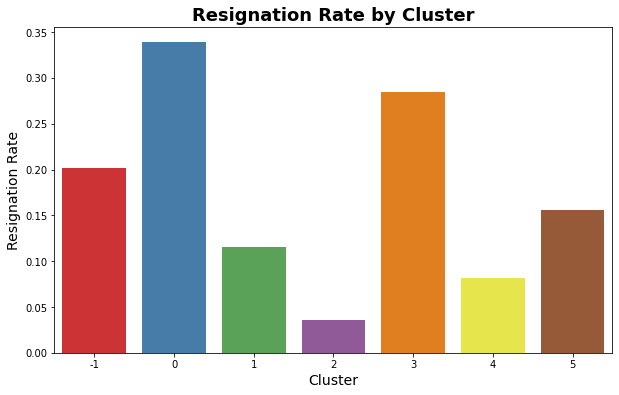

In [54]:
# DBSCAN on our scaled df_2_lower_eps dataset with the lower eps value
dbscan_df_loweps = DBSCAN(eps=0.95, min_samples=15)
df_2_lower_eps['Cluster'] = dbscan_df_loweps.fit_predict(df_2_lower_eps) 
# Add 'Resigned' back to df_2 AFTER DBSCAN modelling
df_2_lower_eps['Resigned'] = df['Resigned']
# Visualise the same results as before to compare modelling techniques
resignation_rate_dbscan_loweps = df_2_lower_eps.groupby('Cluster')['Resigned'].mean()
# Plot the resignation rate per cluster
plt.figure(figsize=(10,6))
sns.barplot(x=resignation_rate_dbscan_loweps.index, y=resignation_rate_dbscan_loweps.values, palette='Set1')
plt.xlabel('Cluster',fontsize=14)
plt.ylabel('Resignation Rate', fontsize=14)
plt.title('Resignation Rate by Cluster',fontsize=18, fontweight='bold')
plt.show()

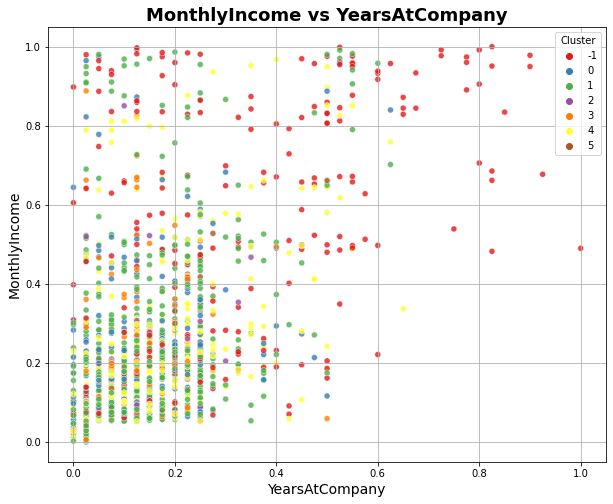

In [55]:
# YearsAtCompany vs MonthlyIncome
df_subset1_dbscan_loweps = df_2_lower_eps[['YearsAtCompany', 'MonthlyIncome']]
plot_data(df_subset1_dbscan_loweps, hue=(df_2_lower_eps['Cluster']))

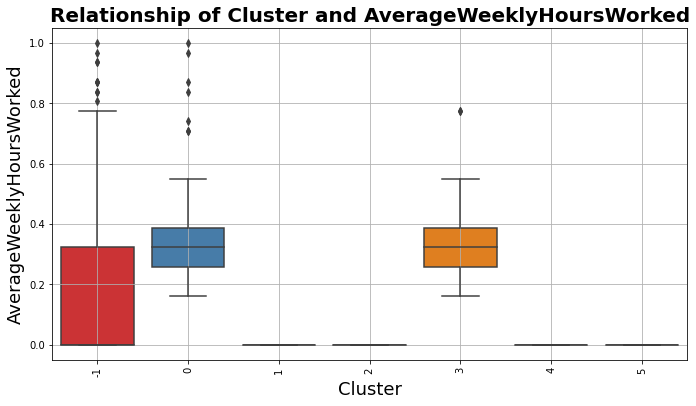

In [56]:
# Average Weekly Hours Worked by Cluster
df_subset5_dbscan_loweps = df_2_lower_eps[['Cluster','AverageWeeklyHoursWorked']]
plot_relation_data(df_subset5_dbscan_loweps, kind='box', x_col='Cluster',y_col='AverageWeeklyHoursWorked', palette='Set1')

### 2.3 Model evaluation techniques we used/ exist

The below summarises the used KMeans Model evaluation techniques as well as the DBSCAN Evaluation method. We also defined an extrinsic KMeans evaluation method which can't be used here, as no true-labels exist.

### 2.3.1 Functions for KMeans Model evaluation WCSS and Silhouette Score

In [57]:
# Function to plot WCSS and Silhouette Score next to each other
def intrinsic_evaluation_wcss_silhouette(df, k_range=range(2,22)):
    # Empty list holding inertia value and silhouette coefficients for each k
    inertia_lst = []
    silhouette_coefficients = []
    # WCSS model
    for k in k_range:
        km_model = KMeans(n_clusters=k, random_state=30)
        km_model.fit(df)
        inertia_lst.append(km_model.inertia_)
    
        if k>1: # Silhouette score only has meaning with at least 2 clusters
            score = silhouette_score(df, km_model.labels_)
            silhouette_coefficients.append(score)
    
    plt.figure(figsize=(12,8))
    # First plot WCSS
    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertia_lst, marker='o')
    plt.xticks(k_range)
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('Inertia', fontsize=14)
    plt.title('Elbow Method for optiomal k', fontsize=18, fontweight='bold')
    
    # Second plot silhouette coeffiencts
    plt.subplot(1, 2, 2)
    plt.plot(k_range[1:], silhouette_coefficients, marker='o')
    plt.xticks(k_range[1:])
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('Silhouette Coefficient', fontsize=14)
    plt.title('Silhouette Coefficient for optiomal k', fontsize=18, fontweight='bold')
    # Show graph
    plt.tight_layout
    plt.show()

### 2.3.2 Comparison to an extrinsic evaluation `Adjusted Rand Index`

In [58]:
# Define ARI
def plot_ARI(df, true_labels, k_range=range(3, 13)): 
    
    ari_scores = [] 

    for k in k_range: 
        km_model = KMeans(n_clusters=k, random_state=30) 
        km_model.fit(df.values) 
        score = adjusted_rand_score(true_labels, km_model.labels_) 
        ari_scores.append(score) 
    # Plot ARI
    plt.figure(figsize=(12,6)) 
    plt.plot(k_range, ari_scores, marker='o') 
    plt.xticks(k_range) 
    plt.xlabel("Number of Clusters") 
    plt.ylabel("ARI Score") 
    plt.title("ARI Score vs Number of Clusters")
    plt.show()

<b>We can't use Adjusted Rand Index here, as we don't have the true labels for our modelled subset dataframes.</b>

### 2.3.3 Model Evaluation for DBSCAN k-th Nearest Neighbour

In [59]:
# Function to plot kth nearest neighbour
def plot_kth_nn(df, k):
    # Fit the neighbour model
    nbrs = NearestNeighbors(n_neighbors=15)
    nbrs_fit = nbrs.fit(df)
    distances, indices = nbrs_fit.kneighbors(df)
    # Sort
    k_distance = np.sort(distances[:, k-1])
    plt.figure(figsize=(14,8))
    plt.plot(k_distance)
    plt.title(f"{k+1}-th Nearest Neighbor Distance", fontsize=18, fontweight='bold')
    plt.xlabel(f"Sorted by distance", fontsize=14)
    plt.ylabel(f"{k+1}-th Nearest Neighbour Distance", fontsize=14)
    plt.gca().invert_xaxis()
    plt.grid()
    plt.show()

This concludes the Coding of Assignment 2, please refer to the report for deeper insights of the Model performance.